In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importando o dataset escolhido pelo grupo

df = pd.read_pickle('../../datasets/processed/movies.pkl')


In [3]:
#Informação e descrição do dataset
print(df.info())
print(df.describe())



#Para nossa análise é bom saber...

#    ano => máx e mín
#    rating => média, máx e mín
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              2000 non-null   object  
 1   rating             2000 non-null   float64 
 2   year               2000 non-null   uint16  
 3   month              2000 non-null   category
 4   certificate        2000 non-null   category
 5   runtime            2000 non-null   uint8   
 6   directors          2000 non-null   object  
 7   stars              2000 non-null   object  
 8   genre              2000 non-null   object  
 9   filming_location   2000 non-null   category
 10  budget             2000 non-null   float64 
 11  income             2000 non-null   float64 
 12  country_of_origin  2000 non-null   object  
dtypes: category(3), float64(3), object(5), uint16(1), uint8(1)
memory usage: 137.8+ KB
None
            rating         year      runtime        budget       

In [4]:
#Agora utilizaremos um dataset do Oscar

df_oscar = pd.read_pickle("../../datasets/processed/the_oscar_award.pkl")
(df_oscar.isnull().sum() / df_oscar.shape[0])*100
df_oscar = df_oscar.dropna(subset=["name", "film", "winner"])
df_oscar.isnull().sum()

year_film        0
year_ceremony    0
ceremony         0
category         0
name             0
film             0
winner           0
dtype: int64

In [5]:
#alteração de nome das colunas para o merge inner (title - year)
df_oscar.columns = ["year", "year_ceremony", "ceremony", "category", "name", "title", "winner"]
df_oscar.head()

,year,year_ceremony,ceremony,category,name,title,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [6]:
df_oscar.info()
df_oscar.columns
df_oscar.loc[df_oscar['title']=='Parasite']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10449 entries, 0 to 10448
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           10449 non-null  uint16
 1   year_ceremony  10449 non-null  uint16
 2   ceremony       10449 non-null  uint8 
 3   category       10449 non-null  object
 4   name           10449 non-null  object
 5   title          10449 non-null  object
 6   winner         10449 non-null  bool  
dtypes: bool(1), object(3), uint16(2), uint8(1)
memory usage: 306.2+ KB


,year,year_ceremony,ceremony,category,name,title,winner
10006,2019,2020,92,DIRECTING,Bong Joon Ho,Parasite,True
10021,2019,2020,92,FILM EDITING,Yang Jinmo,Parasite,False
10026,2019,2020,92,INTERNATIONAL FEATURE FILM,South Korea,Parasite,True
10050,2019,2020,92,BEST PICTURE,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,True
10055,2019,2020,92,PRODUCTION DESIGN,Production Design: Lee Ha Jun; Set Decoration:...,Parasite,False
10090,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True


In [7]:
#Pega os filmes que ganharam Oscar a partir de 2003
df_oscar_2003_up = df_oscar.loc[(df_oscar['year']>= 2003) & (df_oscar['winner']==True)]

#Pega os filmes que ganharam Oscar de melhor FILME a partir de 2003
df_oscar_2003_up_best_picture = df_oscar_2003_up.loc[(df_oscar_2003_up['category'] == 'BEST PICTURE')]

#Cria um DataSeries de quantidade de Oscars' recebidos
df_group_oscar_2003_up_prize_quantity = df_oscar_2003_up.groupby(['title']).size().reset_index()

#Cria títulos para colunas
df_group_oscar_2003_up_prize_quantity.columns = ["title", "oscars"]

#Junta as df's => df + df_oscar_2003_up
df_merge = df.merge(df_oscar_2003_up, how="inner", on=["title", "year"])



In [8]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 317
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              318 non-null    object  
 1   rating             318 non-null    float64 
 2   year               318 non-null    uint16  
 3   month              318 non-null    category
 4   certificate        318 non-null    category
 5   runtime            318 non-null    uint8   
 6   directors          318 non-null    object  
 7   stars              318 non-null    object  
 8   genre              318 non-null    object  
 9   filming_location   318 non-null    category
 10  budget             318 non-null    float64 
 11  income             318 non-null    float64 
 12  country_of_origin  318 non-null    object  
 13  year_ceremony      318 non-null    uint16  
 14  ceremony           318 non-null    uint8   
 15  category           318 non-null    object  
 16  name    

In [9]:
df_merge.describe()

,rating,year,runtime,budget,income,year_ceremony,ceremony
count,318.000000,318.000000,318.000000,3.180000e+02,3.180000e+02,318.000000,318.000000
mean,7.798742,2012.106918,130.081761,7.317294e+07,3.897495e+08,2013.106918,85.106918
std,0.525259,5.462913,24.237643,6.488812e+07,4.169900e+08,5.462913,5.462913
min,5.800000,2003.000000,86.000000,1.500000e+05,2.710090e+05,2004.000000,76.000000
25%,7.500000,2007.000000,115.000000,1.910000e+07,1.065105e+08,2008.000000,80.000000
50%,7.800000,2012.000000,126.000000,4.000000e+07,2.323491e+08,2013.000000,85.000000
75%,8.100000,2017.000000,143.000000,1.100000e+08,5.270163e+08,2018.000000,90.000000
max,9.000000,2021.000000,201.000000,2.500000e+08,2.922918e+09,2022.000000,94.000000


<Axes: >

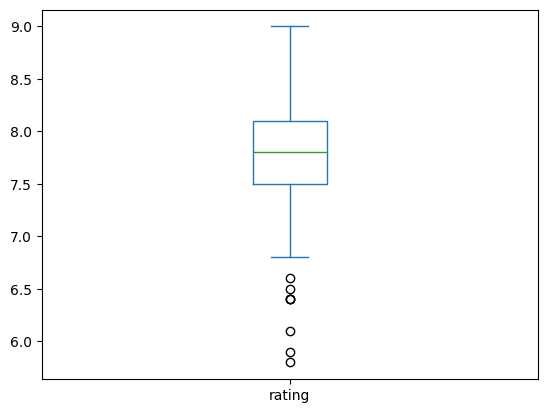

In [10]:
#descobrir os outliers do df
df_merge.loc[df_merge['winner']]["rating"].plot(kind="box")

In [11]:
print(np.where(df_merge['rating']<6.75))

(array([ 89, 170, 198, 199, 208, 243, 263, 264]),)


In [12]:
#Os vencedores de Oscar com as piores notas

df_piores_ganhadores = df_merge[df_merge.index.isin([ 89, 170, 198, 199, 208, 243, 263, 264])]
df_piores_ganhadores = df_piores_ganhadores.sort_values(by='rating')

df_piores_ganhadores

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin,year_ceremony,ceremony,category,name,winner
208,The Wolfman,5.8,2010,February,R,103,Joe Johnston,"Benicio Del Toro, Anthony Hopkins, Emily Blunt...","Drama, Fantasy, Horror",UK,150000000.0,1.397898e+08,United States,2011,83,MAKEUP,Rick Baker and Dave Elsey,True
89,Suicide Squad,5.9,2016,August,PG-13,123,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...","Action, Adventure, Fantasy",Canada,175000000.0,7.468469e+08,United States,2017,89,MAKEUP AND HAIRSTYLING,"Alessandro Bertolazzi, Giorgio Gregorini and C...",True
243,The Golden Compass,6.1,2007,December,PG-13,113,Chris Weitz,"Nicole Kidman, Daniel Craig, Dakota Blue Richa...","Adventure, Family, Fantasy",Norway,180000000.0,3.722349e+08,"United Kingdom, United States",2008,80,VISUAL EFFECTS,"Michael Fink, Bill Westenhofer, Ben Morris and...",True
198,Alice in Wonderland,6.4,2010,March,PG,108,Tim Burton,"Mia Wasikowska, Johnny Depp, Helena Bonham Car...","Adventure, Family, Fantasy",UK,200000000.0,1.025468e+09,United States,2011,83,ART DIRECTION,Production Design: Robert Stromberg; Set Decor...,True
199,Alice in Wonderland,6.4,2010,March,PG,108,Tim Burton,"Mia Wasikowska, Johnny Depp, Helena Bonham Car...","Adventure, Family, Fantasy",UK,200000000.0,1.025468e+09,United States,2011,83,COSTUME DESIGN,Colleen Atwood,True
263,Happy Feet,6.4,2006,November,PG,108,"George Miller, Warren Coleman, Judy Morris","Elijah Wood, Brittany Murphy, Hugh Jackman, Ro...","Animation, Adventure, Comedy",Australia,100000000.0,3.843361e+08,"United States, Australia",2007,79,ANIMATED FEATURE FILM,George Miller,True
264,Marie Antoinette,6.5,2006,October,PG-13,123,Sofia Coppola,"Kirsten Dunst, Jason Schwartzman, Rip Torn, St...","Biography, Drama, History",France,40000000.0,6.091719e+07,"United States, France, Japan",2007,79,COSTUME DESIGN,Milena Canonero,True
170,Anna Karenina,6.6,2012,September,R,129,Joe Wright,"Keira Knightley, Jude Law, Aaron Taylor Johnso...","Drama, Romance",Russia,40600000.0,6.892915e+07,"United Kingdom, United States",2013,85,COSTUME DESIGN,Jacqueline Durran,True


In [13]:
#ganhadores de melhores filmes a partir de 2003
array_oscar_2003_up_best_picture = np.array(df_oscar_2003_up_best_picture['title'].unique())

#ganhadores de melhores filmes a partir de 2003 pelo df do IMDB
df_merge_best_picture = df_merge.loc[df_merge['category']== 'BEST PICTURE']

array_df_merge_best_picture = np.array(df_merge_best_picture["title"].unique())

#print(f"ARRAY 1 {array_oscar_2003_up_best_picture}\nARRAY 2 {array_df_merge_best_picture}")

#Descobrir os filmes faltantes no dataset do IMDB que ganharam o Oscar de melhor filme
array_resultado = np.setdiff1d(array_oscar_2003_up_best_picture, array_df_merge_best_picture)

print(f'RESULTADO {array_resultado}')

RESULTADO ['Crash' 'The Artist' 'The Hurt Locker']


In [14]:
'''
Segunda análise a comparação de médias dos vencedores do Oscar contra os filmes do df IMDB

Premissa => a média dos vencedores tem que ser maior que a média dos filmes do df
'''

print("Média dos ratings do df      ", df['rating'].mean())
print("Média dos ratings do df_merge", df_merge['rating'].mean())
print(f"Diferença foi de {df_merge['rating'].mean()-df['rating'].mean()}")

Média dos ratings do df       6.66765
Média dos ratings do df_merge 7.79874213836478
Diferença foi de 1.1310921383647798


<Axes: >

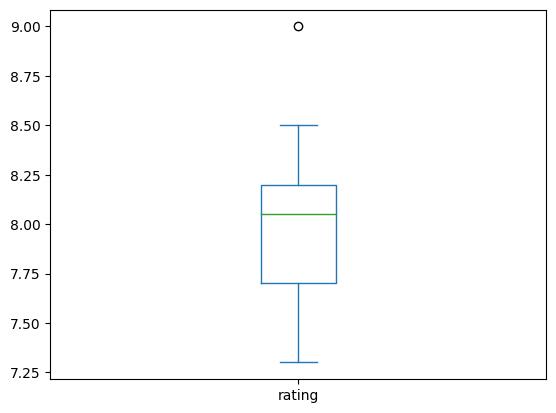

In [15]:
'''
Descobrir se existe outliers entre os ganhadores do Oscar de melhor filme entre 2003 e 2021
'''

df_winners = df_merge.loc[df_merge['category'] == "BEST PICTURE"]
df_winners["rating"].plot(kind="box")

In [16]:
# Descobrimos o outlier

df_merge_outlier = df_merge.loc[df_merge['rating']> 8.75]

print(df_merge_outlier['title'].unique())

['Inception' 'The Dark Knight'
 'The Lord of the Rings: The Return of the King']


In [17]:
'''
O por quê de ser um outlier - Número de Oscars? | Popularidade? | Qualidade?
'''

df_merge_outlier.groupby(["title"]).size()

'''
No Rotten Tomatoes
-------------------------------------------------------------------------------------

INCEPTION                                     => 87% TOMATOMETER & 91% AUDIENCE SCORE

THE DARK KNIGHT RISES                         => 87% TOMATOMETER & 90% AUDIENCE SCORE

THE LORD OF THE RINGS: THE RETURN OF THE KING => 93% TOMATOMETER & 86% AUDIENCE SCORE
'''

'\nNo Rotten Tomatoes\n-------------------------------------------------------------------------------------\n\nINCEPTION                                     => 87% TOMATOMETER & 91% AUDIENCE SCORE\n\nTHE DARK KNIGHT RISES                         => 87% TOMATOMETER & 90% AUDIENCE SCORE\n\nTHE LORD OF THE RINGS: THE RETURN OF THE KING => 93% TOMATOMETER & 86% AUDIENCE SCORE\n'